In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.script import *
from fastai.vision import *
from fastai.callbacks import *
from fastai.distributed import *
from fastai.callbacks.tracker import *

torch.backends.cudnn.benchmark = True

import time

In [3]:
import fastai;fastai.__version__ #safety check

'1.0.57'

In [4]:
import torch; torch.__version__ #safety check

'1.2.0'

In [5]:
from adamod import AdaMod

In [6]:
#from autoadam import AutoAdam

In [7]:
from diffgrad import DiffGrad

ModuleNotFoundError: No module named 'diffgrad'

In [ ]:
#from ranger_diffgrad1 import Ranger_DiffGrad

In [8]:
#from mixnet import MixNet

In [9]:
#from ranger import Ranger

In [10]:
from mxresnet import *

Mish activation loaded...


In [11]:
path = untar_data(URLs.IMAGEWOOF_160); path  #optional - IMAGENETTE

PosixPath('/home/ubuntu/.fastai/data/imagewoof-160')

In [12]:
def flattenAnneal(learn:Learner, lr:float, n_epochs:int, start_pct:float):
  n = len(learn.data.train_dl)
  anneal_start = int(n*n_epochs*start_pct)
  anneal_end = int(n*n_epochs) - anneal_start
  phases = [TrainingPhase(anneal_start).schedule_hp('lr', lr),
           TrainingPhase(anneal_end).schedule_hp('lr', lr, anneal=annealing_cos)]
  sched = GeneralScheduler(learn, phases)
  learn.callbacks.append(sched)
  learn.fit(n_epochs)


In [13]:
tfms = ([

        flip_lr(p=0.5)#,
        #brightness(change=(0.4,0.6)),
        #contrast(scale=(0.7,1.3)),
        #cutout(n_holes=(2,40),length=(5,30),p=.25)

    ], [])

In [14]:
bs=64
size=128

In [15]:
data = (ImageList.from_folder(path)
        .split_by_folder(valid='val')
        .label_from_folder()
        .transform(tfms=tfms,size=size) 
        .databunch(bs=bs, num_workers=8)  #windows 10 users - num_workers may need to be set to 1 or 0 (if you get pickle fork error)
        .presize(size, scale=(0.5, 1))
        .normalize(imagenet_stats))

In [16]:
#learn.purge;learn.destroy  # to reset learner if needed

In [17]:
from mxresnet import *

In [19]:
from diffgrad import DiffGrad

ModuleNotFoundError: No module named 'diffgrad'

In [20]:
#optar = partial(DiffGrad, version=1, betas=(.95,.999),eps=1e-6)

In [18]:
from diffmod import DiffMod

In [19]:
optar = partial(DiffMod,version=1,betas=(.95,.999),eps=1e-6,len_memory = 300, average_step=True, debug_print=False)

In [20]:
#learn.purge();learn.destroy();gc.collect()

In [21]:
model = mxresnet50(sa=1)

In [22]:
learn = Learner(data, model, metrics=[accuracy], wd=1e-3,
                opt_func=optar,
                 bn_wd=False, true_wd=True,
                loss_func = LabelSmoothingCrossEntropy())

In [23]:
learn.callback_fns += [
        partial(ShowGraph),
        #partial(SaveModelCallback, name='model-novotest-1')
    ]

DiffMod: length of memory is  300  and b3 is thus  0.9966666666666667 and base =  0.0033333333333333335
DiffMod: step size and exp avg step will be averaged together.


epoch,train_loss,valid_loss,accuracy,time
0,2.746320,3.528060,0.246000,00:39
1,2.505975,2.566986,0.388000,00:36
2,2.328559,2.405286,0.464000,00:35
3,2.164541,2.223878,0.554000,00:36
4,1.982098,1.989985,0.646000,00:35


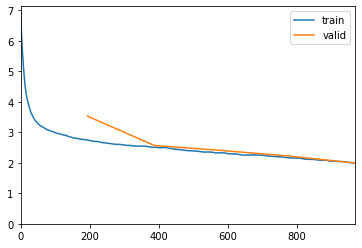

In [24]:
flattenAnneal(learn,4e-3, 5, .75)

DiffMod: length of memory is  2000  and b3 is thus  0.9995 and base =  0.0005
DiffMod: step size and exp avg step will be averaged together.


epoch,train_loss,valid_loss,accuracy,time
0,2.755652,2.716245,0.298000,00:40
1,2.460058,2.900356,0.350000,00:36
2,2.343215,2.437789,0.446000,00:36
3,2.186890,2.320123,0.504000,00:36
4,2.047573,2.107845,0.594000,00:36
5,1.963928,1.975349,0.634000,00:36
6,1.876129,1.953829,0.638000,00:36
7,1.809734,1.903292,0.654000,00:36
8,1.751714,1.967907,0.650000,00:36
9,1.725143,1.836383,0.692000,00:36


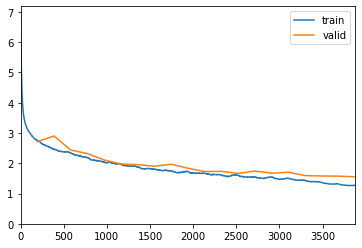

In [27]:
flattenAnneal(learn,4e-3, 5, .75)

epoch,train_loss,valid_loss,accuracy,time
0,1.255497,1.549743,0.804000,00:36
1,1.217543,1.595642,0.792000,00:36
2,1.217039,1.523003,0.828000,00:36
3,1.200502,1.617853,0.796000,00:36
4,1.185869,1.610751,0.812000,00:36
5,1.167759,1.521862,0.810000,00:36
6,1.162212,1.597747,0.828000,00:36
7,1.152529,1.578115,0.824000,00:36
8,1.128304,1.622945,0.804000,00:36
9,1.132135,1.609013,0.802000,00:36


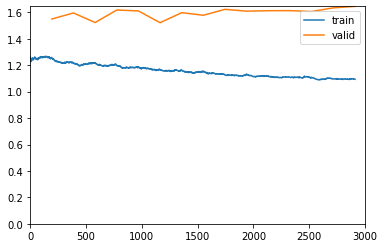

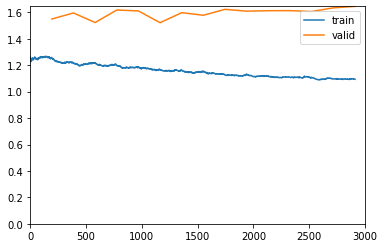

In [28]:
flattenAnneal(learn,4e-4, 60, .72)

DiffMod: length of memory is  1500  and b3 is thus  0.9993333333333333 and base =  0.0006666666666666666
DiffMod: step size and exp avg step will be averaged together.


epoch,train_loss,valid_loss,accuracy,time
0,2.723233,2.649463,0.326000,00:40
1,2.499779,2.911843,0.318000,00:36
2,2.298313,2.407610,0.448000,00:37
3,2.206216,2.266453,0.496000,00:36
4,2.095358,2.163178,0.536000,00:37
5,1.987242,2.349533,0.554000,00:37
6,1.897914,2.105607,0.586000,00:37
7,1.853612,1.977443,0.630000,00:36
8,1.760903,1.826341,0.726000,00:36
9,1.725334,1.831218,0.694000,00:36


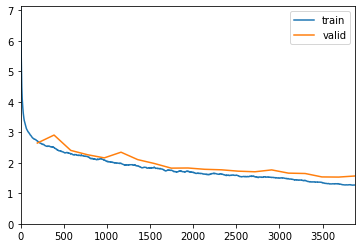

In [19]:
flattenAnneal(learn,4e-3, 20, .72)

DiffMod: length of memory is  2000  and b3 is thus  0.9995 and base =  0.0005
DiffMod: step size and exp avg step will be averaged together.


epoch,train_loss,valid_loss,accuracy,time
0,2.726246,2.649999,0.342000,00:40
1,2.473793,2.512500,0.428000,00:37
2,2.293314,2.444304,0.438000,00:36
3,2.191976,2.227602,0.532000,00:37
4,2.082372,2.161932,0.570000,00:37
5,1.975745,2.097518,0.604000,00:37
6,1.890482,1.930629,0.668000,00:37
7,1.819518,2.102457,0.634000,00:37
8,1.753556,1.868502,0.696000,00:37
9,1.677396,1.741450,0.746000,00:36


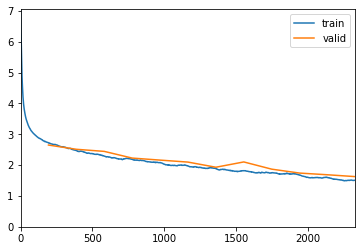

In [25]:
flattenAnneal(learn,4e-3,12,.72) #average, version 1

epoch,train_loss,valid_loss,accuracy,time
0,1.481219,1.701551,0.748000,00:37
1,1.461385,1.590872,0.790000,00:36
2,1.424024,1.577940,0.776000,00:37
3,1.415886,1.650117,0.784000,00:37
4,1.375761,1.563962,0.800000,00:37
5,1.320986,1.615135,0.780000,00:37


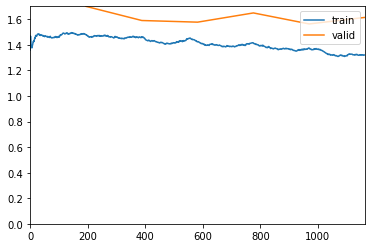

In [26]:
flattenAnneal(learn,8e-4,6,.72)

length of memory is  2000  and b3 is thus  0.9995 and base =  0.0005


epoch,train_loss,valid_loss,accuracy,time
0,2.956373,2.776645,0.302000,00:38
1,2.524418,2.546373,0.400000,00:36
2,2.351233,2.468790,0.436000,00:35
3,2.210099,2.437958,0.494000,00:35
4,2.091897,2.217029,0.526000,00:35
5,1.997477,2.135444,0.590000,00:36
6,1.898074,2.005924,0.646000,00:35
7,1.842314,1.931997,0.684000,00:35
8,1.783326,1.856704,0.694000,00:35
9,1.713373,1.912330,0.692000,00:35


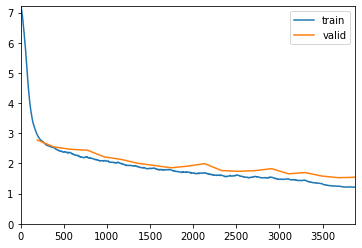

In [17]:
flattenAnneal(learn,4e-3,20,.72)

length of memory is  0.999  and b3 is thus  0.9989989989989989 and base =  1.001001001001001


epoch,train_loss,valid_loss,accuracy,time
0,2.718259,2.645999,0.352000,01:03
1,2.451341,2.588782,0.398000,00:43
2,2.341963,2.330593,0.500000,00:42


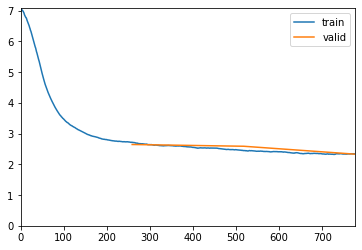

In [23]:
learn.fit(3,6e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.104703,2.309452,0.556000,00:43
1,1.988504,2.202686,0.576000,00:44


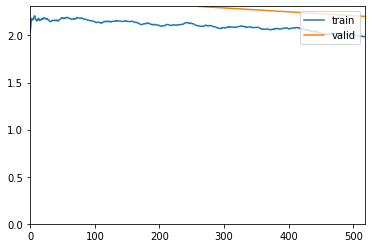

In [24]:
learn.fit(2,2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.761173,2.813446,0.276000,00:43
1,2.507088,2.739176,0.362000,00:44
2,2.327849,2.246113,0.508000,00:44
3,2.197709,2.181771,0.540000,00:44
4,2.129965,2.111772,0.576000,00:44


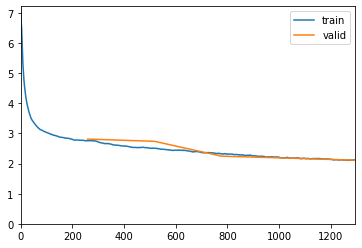

In [33]:
learn.fit(5,5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.880364,1.885675,0.676000,00:44
1,1.853015,1.818804,0.710000,00:44
2,1.825157,1.819012,0.688000,00:44
3,1.775133,1.764323,0.712000,00:44


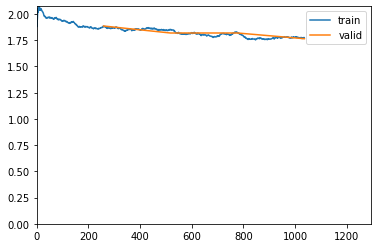

In [ ]:
learn.fit(5,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.676691,2.814767,0.330000,00:47
1,2.446523,2.551137,0.434000,00:44
2,2.264103,2.398828,0.476000,00:44
3,2.148281,2.212435,0.534000,00:44
4,2.028446,2.107017,0.566000,00:43


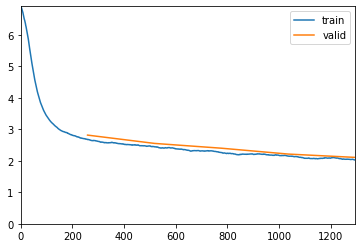

In [27]:
learn.fit(5,5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.379197,1.565027,0.808000,01:04
1,1.359308,1.553725,0.812000,01:05
2,1.330693,1.541194,0.810000,01:05
3,1.332649,1.552637,0.810000,01:06
4,1.332059,1.552498,0.806000,01:05


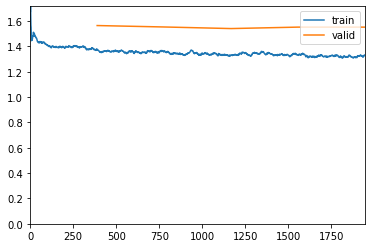

In [31]:
learn.fit(5,3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.889567,1.977999,0.638000,01:05
1,1.871076,1.866840,0.692000,01:05
2,1.776636,1.863308,0.696000,01:06
3,1.741675,1.757717,0.728000,01:05
4,1.723693,1.845103,0.720000,01:05


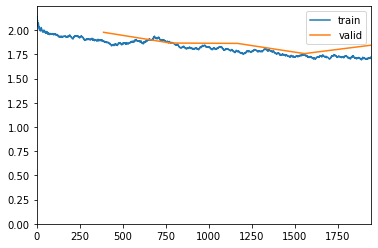

In [28]:
learn.fit(5,4e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.633019,2.579610,0.374000,01:07
1,2.474779,3.666046,0.216000,01:04
2,2.312076,2.264325,0.516000,01:07
3,2.205864,2.481819,0.478000,01:06
4,2.077268,2.260590,0.544000,01:05


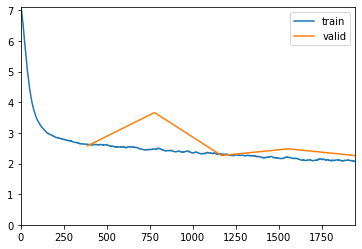

In [27]:
learn.fit(5,8e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.016188,2.942030,0.258000,00:40
1,2.686041,2.547606,0.438000,00:36
2,2.596116,2.395356,0.492000,00:36
3,2.503528,2.372013,0.480000,00:36
4,2.453692,2.207095,0.556000,00:37
5,2.394387,2.111431,0.608000,00:36
6,2.335392,2.051383,0.620000,00:36
7,2.278429,2.129225,0.628000,00:36
8,2.257106,2.030133,0.614000,00:37
9,2.206651,1.974748,0.662000,00:36


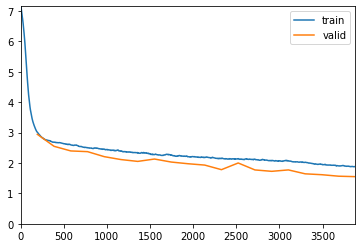

In [27]:
flattenAnneal(learn, 3e-3, 20, .72)

epoch,train_loss,valid_loss,accuracy,time
0,2.818024,2.806956,0.324000,00:36
1,2.497384,2.705157,0.336000,00:36
2,2.297828,2.351257,0.494000,00:36
3,2.162976,2.564630,0.478000,00:36
4,2.085394,2.134407,0.562000,00:36
5,1.980512,2.122743,0.592000,00:36
6,1.913571,2.061408,0.614000,00:36
7,1.842414,2.114565,0.654000,00:37
8,1.782977,1.886731,0.698000,00:36
9,1.733582,1.829760,0.722000,00:36


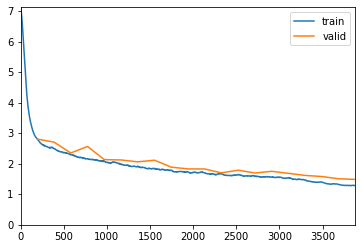

In [38]:
flattenAnneal(learn, 4e-3, 20, .72) #v0

epoch,train_loss,valid_loss,accuracy,time
0,2.741026,2.597859,0.362000,00:35
1,2.388726,2.334276,0.468000,00:36
2,2.254611,2.354142,0.476000,00:35
3,2.160052,2.225876,0.520000,00:35
4,2.072427,2.210597,0.562000,00:35
5,1.961623,1.926916,0.678000,00:35
6,1.886154,1.898283,0.664000,00:35
7,1.840450,1.831788,0.690000,00:36
8,1.797602,1.818803,0.702000,00:35
9,1.730995,1.861084,0.696000,00:36


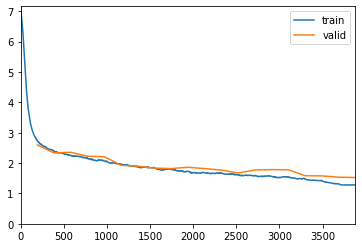

In [32]:
flattenAnneal(learn, 4e-3, 20, .75) #diffmod v1

epoch,train_loss,valid_loss,accuracy,time
0,2.740493,3.189249,0.274000,00:33
1,2.442501,2.697075,0.402000,00:30
2,2.269534,2.230718,0.508000,00:30
3,2.181890,2.414532,0.454000,00:29
4,2.051013,2.053078,0.618000,00:29
5,1.984494,2.159319,0.560000,00:29
6,1.935787,1.870416,0.686000,00:29
7,1.834350,2.062936,0.622000,00:29
8,1.806075,1.849439,0.698000,00:29
9,1.760089,2.090333,0.588000,00:30


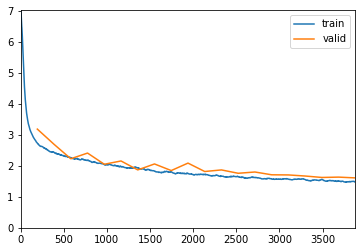

In [24]:
learn.fit(20,5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.730012,3.522054,0.262000,00:56
1,2.440285,2.617819,0.434000,00:32
2,2.279020,2.583462,0.442000,00:31
3,2.178424,2.440398,0.436000,00:31
4,2.095822,2.140848,0.576000,00:31
5,2.003224,2.053161,0.630000,00:31
6,1.908267,1.855590,0.682000,00:31
7,1.847529,1.946657,0.662000,00:31
8,1.792306,1.849174,0.714000,00:31
9,1.759592,1.949074,0.694000,00:38


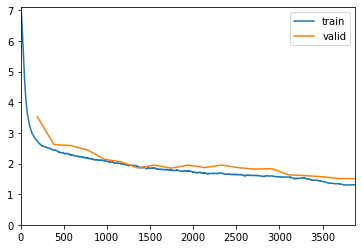

In [16]:
flattenAnneal(learn, 4e-3, 20, .75) #adamod base

epoch,train_loss,valid_loss,accuracy,time
0,2.758223,2.762700,0.320000,00:34
1,2.498939,2.520245,0.392000,00:31
2,2.354712,2.340736,0.460000,00:31
3,2.197485,2.214212,0.526000,00:30
4,2.129957,2.189941,0.550000,00:31
5,2.015059,1.975239,0.662000,00:31
6,1.959366,2.036716,0.636000,00:31
7,1.899160,2.028209,0.660000,00:32
8,1.815370,1.854039,0.698000,00:31
9,1.769482,1.837504,0.694000,00:32


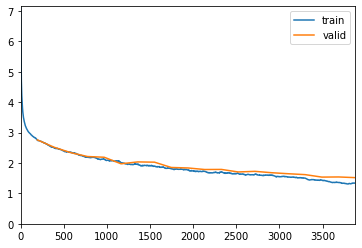

In [24]:
flattenAnneal(learn, 4e-3, 20, .75) #diffgrad

epoch,train_loss,valid_loss,accuracy,time
0,2.833390,2.699824,0.354000,00:35
1,2.548797,2.675118,0.342000,00:33
2,2.391769,2.478258,0.424000,00:32
3,2.267454,2.193657,0.556000,00:31
4,2.182068,2.529324,0.534000,00:32
5,2.055904,2.122666,0.570000,00:33
6,1.954961,2.240763,0.590000,00:32
7,1.864358,1.884452,0.672000,00:33
8,1.795261,1.849918,0.692000,00:32
9,1.734303,1.733793,0.756000,00:32


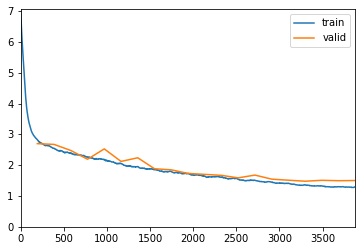

In [22]:
learn.fit_one_cycle(20,8e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.993190,2.822077,0.314000,00:35
1,2.616494,2.665964,0.346000,00:31
2,2.382699,2.424042,0.460000,00:31
3,2.249791,2.478822,0.470000,00:32
4,2.169872,2.319252,0.462000,00:32
5,2.053635,2.265847,0.538000,00:33
6,1.919993,1.876316,0.678000,00:32
7,1.840100,2.183166,0.586000,00:31
8,1.741628,1.788778,0.728000,00:31
9,1.693138,1.887023,0.714000,00:32


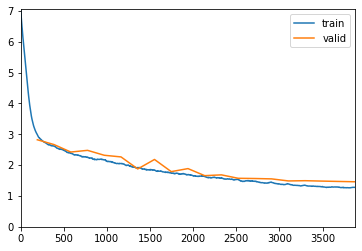

In [22]:
learn.fit_one_cycle(20,4e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.376083,2.543161,0.458000,00:36
1,1.955864,1.932200,0.682000,00:32
2,1.738561,1.641399,0.782000,00:33
3,1.571276,1.508449,0.840000,00:33
4,1.493405,1.445910,0.862000,00:33


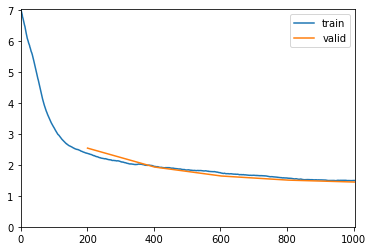

In [22]:
learn.fit_one_cycle(5,4e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.915032,2.821275,0.282000,00:32
1,2.729244,2.614827,0.366000,00:32
2,2.624524,2.643105,0.414000,00:32
3,2.531703,2.401488,0.468000,00:31
4,2.455483,2.492201,0.444000,00:32
5,2.371869,2.160528,0.598000,00:32
6,2.347112,2.045589,0.630000,00:31
7,2.282213,1.993346,0.638000,00:33
8,2.247681,1.904134,0.696000,00:32
9,2.222119,1.896390,0.688000,00:32


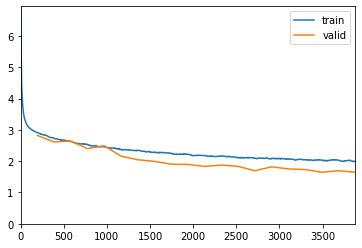

In [30]:
learn.fit(20,3e-3) #v1

epoch,train_loss,valid_loss,accuracy,time
0,2.760318,2.705876,0.308000,00:35
1,2.505301,2.428731,0.454000,00:31
2,2.363295,2.402072,0.432000,00:31
3,2.210432,2.248763,0.500000,00:31
4,2.140493,2.181470,0.542000,00:31
5,2.032414,2.170866,0.576000,00:32
6,1.916482,1.988057,0.630000,00:31
7,1.850592,1.888239,0.682000,00:32
8,1.778943,1.840208,0.708000,00:31
9,1.761827,1.791052,0.740000,00:32


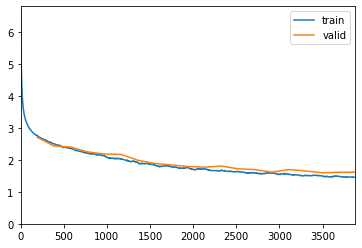

In [22]:
learn.fit(20,4e-3) #v1

In [19]:
#learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


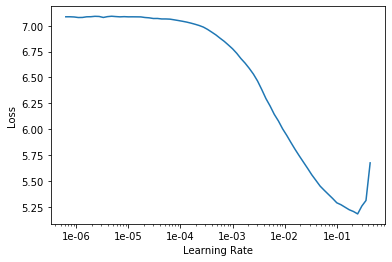

In [20]:
#learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,2.744928,2.662711,0.334000,00:32
1,2.499407,2.528494,0.404000,00:31
2,2.331353,2.525743,0.404000,00:32
3,2.200269,2.270855,0.528000,00:31
4,2.056779,2.089818,0.608000,00:32
5,1.977343,2.151996,0.608000,00:32
6,1.877099,2.284228,0.570000,00:32
7,1.815722,1.897763,0.670000,00:31
8,1.781015,1.874201,0.688000,00:33
9,1.716859,1.780057,0.714000,00:32


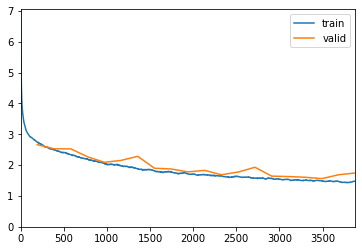

In [21]:
learn.fit(20,4e-3) #v0

epoch,train_loss,valid_loss,accuracy,time
0,2.733951,2.716379,0.350000,00:34
1,2.478821,2.473446,0.426000,00:31
2,2.293517,2.276245,0.532000,00:31
3,2.171782,2.119609,0.578000,00:31
4,2.059656,1.963256,0.638000,00:31
5,1.968898,2.102341,0.600000,00:31
6,1.910046,1.879270,0.682000,00:31
7,1.823214,1.855295,0.702000,00:31
8,1.768201,1.819462,0.702000,00:31
9,1.735258,1.827078,0.716000,00:31


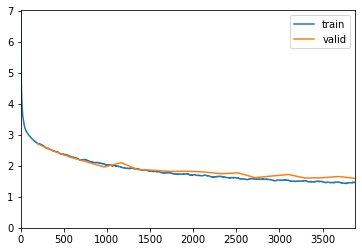

In [20]:
learn.fit(20,4e-3) #v1

[autoreload of diffgrad failed: Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/home/ubuntu/anaconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/ubuntu/anaconda3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/ubuntu/course-v3/nbs

epoch,train_loss,valid_loss,accuracy,time
0,2.710830,2.680972,0.328000,00:35
1,2.413161,2.501697,0.428000,00:31
2,2.245974,2.342880,0.492000,00:31
3,2.116959,2.109904,0.616000,00:31
4,2.009061,2.256759,0.568000,00:31


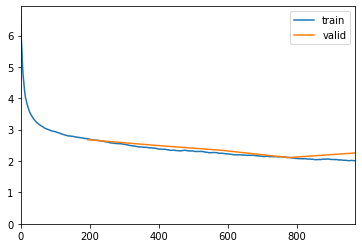

In [18]:
learn.fit(5,4e-3) #v1

epoch,train_loss,valid_loss,accuracy,time
0,2.730675,2.779063,0.298000,00:35
1,2.455382,2.535800,0.394000,00:32
2,2.259683,2.336660,0.466000,00:31
3,2.134786,2.228118,0.558000,00:31
4,2.056129,2.167917,0.588000,00:32


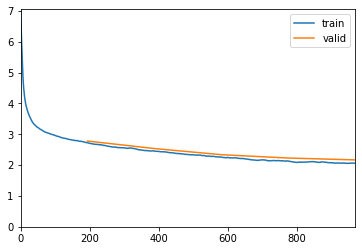

In [17]:
learn.fit(5,4e-3)

In [ ]:
lr = 1e-2

In [ ]:
res = []
num_epoch=5
for x in range(5):
  learn = Learner(data, mxresnet50(c_out=10), wd=1e-2, opt_func=optar,
                 metrics=[accuracy],
                 bn_wd=False, true_wd=True,
                 loss_func=LabelSmoothingCrossEntropy())
  #n = len(learn.data.train_dl)
  #anneal_start = int(n*5*0.7)
  phase0 = TrainingPhase(anneal_start).schedule_hp('lr', lr)
  phase1 = TrainingPhase(n*5 - anneal_start).schedule_hp('lr', lr, anneal=annealing_cos)
  phases = [phase0, phase1]
  sched = GeneralScheduler(learn, phases)
  learn.callbacks.append(sched)
  learn.fit(num_epoch)
  
  loss, acc = learn.validate()
  res.append(acc.numpy())


In [ ]:
#results:
np.mean(res)
print("------")
res
print("std dev: ",np.std(res))